Importing modules

In [1]:
##loading module
import numpy as np
import pandas as pd
import cv2
#from keras.models import load_model
import keras.backend as k1
from sklearn.model_selection import train_test_split
from skimage.io import imread,imshow
from skimage.transform import resize
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,GlobalAveragePooling2D,Convolution2D,AveragePooling2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet121,DenseNet169

#from keras.applications.densenet import preprocess_input
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from glob import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

2022-11-03 19:49:24.192527: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-03 19:49:25.044339: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/hrithik/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-11-03 19:49:25.044407: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-03 19:49:25.183750: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already

Data read

In [2]:
path="augmented-image/"
l=glob(path+"*")
s=len(glob(path+"*"))
print(l)

['augmented-image/late-blight', 'augmented-image/early-blight', 'augmented-image/backkleg', 'augmented-image/septoria', 'augmented-image/safe']


Data Extraction

In [3]:
'''
Extract features from images '''
path="augmented-image/"
l=glob(path+"*")
s=len(glob(path+"*"))
extract=[]
name_items=[]
for i in l:
    name_items.append(i[16:])
print(name_items)

flat_data_arr=[] #input array
target_arr=[] #output array
for j in name_items:
    m=glob("./"+path+j+"/*")
    for h in m:
        s = cv2.imread(h, cv2.IMREAD_COLOR)       
        s = cv2.resize(s, (100,100))
        s= cv2.cvtColor(s, cv2.COLOR_RGB2BGR)
        extract.append([np.array(s),j])
print(len(extract))
ex=extract        



['late-blight', 'early-blight', 'backkleg', 'septoria', 'safe']
1608


Image showing

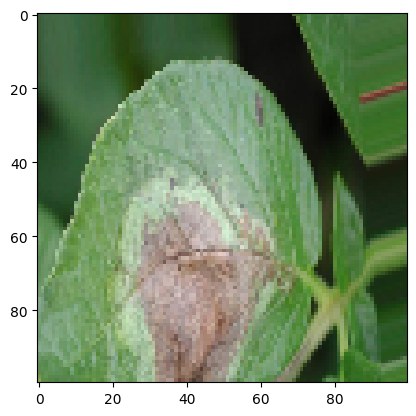

In [4]:
plt.imshow(extract[100][0])

Split features and classes

In [5]:
x=[]
y=[]
for features,class_value in extract:
    x.append(features)
    y.append(class_value)
x=np.array(x)
y=np.array(y)
x=x.reshape(x.shape[0],100,100,3)
print(x.shape)

(1608, 100, 100, 3)


Make stationary 

In [6]:
x=x/255.0


Encoding

In [7]:
lb=LabelEncoder()
y=to_categorical(lb.fit_transform(y))
y


array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

Starting the session

In [8]:
print(x.shape,y.shape)
k1.clear_session()

(1608, 100, 100, 3) (1608, 5)


Split into train and test

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [38]:
y_test.shape

(483,)

Multilayer-perception

In [87]:
#mlp
mlp_model=Sequential()
mlp_model.add(Flatten(input_shape=(100,100,3)))
mlp_model.add(Dense(256,activation="relu"))
mlp_model.add(Dropout(0.2))
mlp_model.add(Dense(128,activation="relu"))
mlp_model.add(Dropout(0.2))

mlp_model.add(Dense(5,activation="softmax"))
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               7680256   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
Total params: 7,713,797
Trainable params: 7,713,797
Non-trainable params: 0
______________________________________________

Compiling

In [88]:
mlp_model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer="adam")

training data 

In [89]:
history=mlp_model.fit(x_train,y_train,epochs=20,batch_size=128,verbose=1,validation_data=(x_test, y_test))

Epoch 1/20

9/9 [==============================] - 2s 157ms/step - loss: 12.7881 - accuracy: 0.2596 - val_loss: 5.1337 - val_accuracy: 0.4099
Epoch 2/20

9/9 [==============================] - 1s 106ms/step - loss: 5.3554 - accuracy: 0.3262 - val_loss: 2.2180 - val_accuracy: 0.4431
Epoch 3/20

9/9 [==============================] - 1s 106ms/step - loss: 2.4530 - accuracy: 0.4160 - val_loss: 1.0253 - val_accuracy: 0.4969
Epoch 4/20

9/9 [==============================] - 1s 105ms/step - loss: 1.2884 - accuracy: 0.4960 - val_loss: 0.7899 - val_accuracy: 0.6170
Epoch 5/20

9/9 [==============================] - 1s 105ms/step - loss: 0.8578 - accuracy: 0.6267 - val_loss: 0.7001 - val_accuracy: 0.7081
Epoch 6/20

9/9 [==============================] - 1s 109ms/step - loss: 0.7479 - accuracy: 0.6809 - val_loss: 0.6348 - val_accuracy: 0.7557
Epoch 7/20

9/9 [==============================] - 1s 105ms/step - loss: 0.6819 - accuracy: 0.7040 - val_loss: 0.5679 - val_accuracy: 0.7578
Epoch 8/20



For machine learning classifier like xgboost, random forrest and more, converting the higher dimensions data into lower by using vgg16 model architecture

In [10]:
from keras.applications.vgg16 import VGG16
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(100,100,3))

2022-11-03 19:50:28.278736: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/hrithik/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-11-03 19:50:28.280674: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-03 19:50:28.280734: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hrithik-Lenovo-ideapad-320-15ISK): /proc/driver/nvidia/version does not exist
2022-11-03 19:50:28.281690: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Make trinable false

In [11]:
for layer in VGG_model.layers:
    layer.trainable=False
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [12]:
feature_extract=VGG_model.predict(x_train)
features=feature_extract.reshape(feature_extract.shape[0],-1)


36/36 [==============================] - 99s 3s/step


In [13]:
x_for_training=features
x_for_training.shape

(1125, 4608)

XGB model making

In [96]:
import xgboost as xgb
xgb_model=xgb.XGBClassifier()
xgb_model.fit(x_for_training,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

Converting testing data using vgg16

In [14]:
##For test data 
feature_extract_test=VGG_model.predict(x_test)
features_test=feature_extract_test.reshape(feature_extract_test.shape[0],-1)


16/16 [==============================] - 44s 3s/step


In [99]:
predicted_xgb=xgb_model.predict(features_test)

In [100]:
print(accuracy_score(y_test,predicted_xgb))

0.9606625258799172


In [17]:
#Random_forrest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=400)
rf.fit(x_for_training,y_train)


RandomForestClassifier(n_estimators=200)

In [18]:
predicted_rf=rf.predict(features_test)
print(accuracy_score(y_test,predicted_rf))

0.937888198757764


Decision tree

In [101]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(x_for_training,y_train)

DecisionTreeClassifier()

In [102]:
predicted_tree=tree.predict(features_test)
print(accuracy_score(y_test,predicted_tree))

0.8385093167701864


In [45]:
x_for_training.shape
y_train.shape

(1125,)

Adaboost

In [64]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
svc=SVC(kernel="linear",probability=True)
adaboost_clf=AdaBoostClassifier(base_estimator=svc,n_estimators=50, random_state=0)

In [65]:
adaboost_clf.fit(x_for_training,y_train)

AdaBoostClassifier(base_estimator=SVC(kernel='linear', probability=True),
                   random_state=0)

In [66]:
predicted_ada=adaboost_clf.predict(features_test)
print(accuracy_score(y_test,predicted_ada))

0.989648033126294


Stacking Ensemble

In [67]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
estimators = [
     ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
     ('svr', make_pipeline(StandardScaler(),
                           LinearSVC(random_state=42))) ]

In [68]:
stack_clf = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression())

In [69]:
stack_clf.fit(x_for_training,y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svr',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(random_state=42))]))],
                   final_estimator=LogisticRegression())

In [70]:
predicted_stack=stack_clf.predict(features_test)
print(accuracy_score(y_test,predicted_stack))

0.9917184265010351


KNN

In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_for_training,y_train)

KNeighborsClassifier()

In [104]:
predicted_knn=knn.predict(features_test)
print(accuracy_score(y_test,predicted_knn))

0.9979296066252588


In [39]:
k1.clear_session()

Densenet121

In [25]:
def ClsModel(n_classes=5, input_shape=(100,100,3)):

    model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(100, 100, 3)) 


    x=model_d.output


    x= GlobalAveragePooling2D()(x)

    x= BatchNormalization()(x)

    x= Dropout(0.5)(x)

    x= Dense(1024,activation='relu')(x) 

    x= Dense(512,activation='relu')(x) 

    x= BatchNormalization()(x)

    x= Dropout(0.5)(x)


    preds=Dense(n_classes,activation='softmax')(x) #
    model=Model(inputs=model_d.input,outputs=preds)
    return model

In [26]:
model121=ClsModel(5,(100,100,3))
model121.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 106, 106, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 50, 50, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1/conv[0][0]']         

In [27]:
for layer in model121.layers[:-5]:

    layer.trainable=False

    

for layer in model121.layers[-5:]:

    layer.trainable=True

In [28]:
model121.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

model121.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 106, 106, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 50, 50, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1/conv[0][0]']         

In [29]:

history=model121.fit(x_train,y_train,epochs=20,batch_size=128,verbose=1,validation_data=(x_test, y_test))

Epoch 1/20

9/9 [==============================] - 45s 4s/step - loss: 1.1543 - accuracy: 0.6489 - val_loss: 0.6953 - val_accuracy: 0.7371
Epoch 2/20

9/9 [==============================] - 32s 4s/step - loss: 0.2981 - accuracy: 0.8880 - val_loss: 0.1337 - val_accuracy: 0.9545
Epoch 3/20

9/9 [==============================] - 32s 4s/step - loss: 0.1915 - accuracy: 0.9280 - val_loss: 0.0646 - val_accuracy: 0.9772
Epoch 4/20

9/9 [==============================] - 32s 4s/step - loss: 0.1622 - accuracy: 0.9520 - val_loss: 0.1390 - val_accuracy: 0.9565
Epoch 5/20

9/9 [==============================] - 32s 4s/step - loss: 0.1144 - accuracy: 0.9609 - val_loss: 0.0460 - val_accuracy: 0.9814
Epoch 6/20

9/9 [==============================] - 31s 4s/step - loss: 0.0975 - accuracy: 0.9662 - val_loss: 0.0314 - val_accuracy: 0.9876
Epoch 7/20

9/9 [==============================] - 32s 4s/step - loss: 0.0960 - accuracy: 0.9751 - val_loss: 0.0433 - val_accuracy: 0.9772
Epoch 8/20

9/9 [==========

In [17]:
x_train.shape
k1.clear_session()

Densenet169

In [18]:
def ClsModel_69(n_classes=5, input_shape=(100,100,3)):
    base_model = DenseNet169(weights=None, include_top=False, input_shape=input_shape)
    x=base_model.output
    x =Flatten()(x)

    x =BatchNormalization()(x)

    

    x =Dropout(0.5)(x)

    x =BatchNormalization()(x)
    x=Dense(1024,activation="relu")(x)
    x =Dense(units=128,
                       activation='relu',
                       )(x)

    x =Dropout(0.5)(x)


    preds=Dense(n_classes,activation='softmax')(x) #
    model=Model(inputs=base_model.input,outputs=preds)
    return model

In [19]:
model169=ClsModel_69(5,(100,100,3))
model169.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 106, 106, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 50, 50, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1/conv[0][0]']         

In [20]:
for layer in model169.layers[:-5]:

    layer.trainable=False

    

for layer in model169.layers[-5:]:

    layer.trainable=True

In [21]:
model169.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
model169.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 106, 106, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 50, 50, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1/conv[0][0]']         

In [22]:

history=model169.fit(x_train,y_train,epochs=20,batch_size=32,verbose=1,validation_data=(x_test, y_test))

Epoch 1/20

36/36 [==============================] - 91s 2s/step - loss: 0.7540 - accuracy: 0.7129 - val_loss: 1.3231 - val_accuracy: 0.5611
Epoch 2/20

36/36 [==============================] - 65s 2s/step - loss: 0.2661 - accuracy: 0.8996 - val_loss: 1.2656 - val_accuracy: 0.5259
Epoch 3/20

36/36 [==============================] - 70s 2s/step - loss: 0.1805 - accuracy: 0.9298 - val_loss: 1.1467 - val_accuracy: 0.6894
Epoch 4/20

36/36 [==============================] - 66s 2s/step - loss: 0.1691 - accuracy: 0.9396 - val_loss: 1.0525 - val_accuracy: 0.8385
Epoch 5/20

36/36 [==============================] - 54s 2s/step - loss: 0.1417 - accuracy: 0.9458 - val_loss: 0.9346 - val_accuracy: 0.7288
Epoch 6/20

36/36 [==============================] - 64s 2s/step - loss: 0.1275 - accuracy: 0.9609 - val_loss: 0.9014 - val_accuracy: 0.6729
Epoch 7/20

36/36 [==============================] - 64s 2s/step - loss: 0.1727 - accuracy: 0.9431 - val_loss: 0.7777 - val_accuracy: 0.6335
Epoch 8/20

3